In [1]:
import pandas as pd
import numpy as np

In [18]:
train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%82%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%87%E1%85%A5TV%E1%84%80%E1%85%A1%E1%84%80%E1%85%A7%E1%86%A8_%E1%84%8E%E1%85%AC%E1%84%8C%E1%85%A9%E1%86%BC.xlsx?raw=true', sheet_name='test')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      7000 non-null   int64
 1   판매가     7000 non-null   int64
 2   화면크기    7000 non-null   int64
 3   형태      7000 non-null   int64
 4   해상도     7000 non-null   int64
 5   화면비율    7000 non-null   int64
 6   LCD     7000 non-null   int64
 7   LED     7000 non-null   int64
 8   OLED    7000 non-null   int64
 9   QLED    7000 non-null   int64
 10  단자      7000 non-null   int64
 11  부가기능    7000 non-null   int64
dtypes: int64(12)
memory usage: 656.4 KB


In [4]:
train_df.isna().sum()

ID      0
판매가     0
화면크기    0
형태      0
해상도     0
화면비율    0
LCD     0
LED     0
OLED    0
QLED    0
단자      0
부가기능    0
dtype: int64

In [5]:
test_df.isna().sum()

ID      0
판매가     0
화면크기    0
형태      0
해상도     0
화면비율    0
LCD     0
LED     0
OLED    0
QLED    0
단자      0
부가기능    0
dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression

In [8]:
# 버려야할 데이터 비율
len(train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)])/len(train_df)

0.052

In [9]:
search_df = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
train_df = train_df.drop(search_df.index, axis=0)
search_df = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
test_df = test_df.drop(search_df.index, axis=0)

In [10]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      6636 non-null   int64
 1   판매가     6636 non-null   int64
 2   화면크기    6636 non-null   int64
 3   형태      6636 non-null   int64
 4   해상도     6636 non-null   int64
 5   화면비율    6636 non-null   int64
 6   LCD     6636 non-null   int64
 7   LED     6636 non-null   int64
 8   OLED    6636 non-null   int64
 9   QLED    6636 non-null   int64
 10  단자      6636 non-null   int64
 11  부가기능    6636 non-null   int64
dtypes: int64(12)
memory usage: 674.0 KB
None


In [11]:
x_train = train_df.drop(['ID', '판매가'], axis=1)
x_test = test_df.drop(['ID', '판매가'], axis=1)
y_train = train_df['판매가']
y_test = test_df['판매가']

In [12]:
# x값과 y값의 행갯수가 일치해야함
# train, test의 열갯수가 일치해야함
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
# 딥러닝에서는 입력 x의 갯수를 사용자가 직접 설정해야함

(6636, 10) (6636,)
(2816, 10) (2816,)


In [ ]:
# 머신러닝 딥러닝에서는 array만 처리함
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
print(model.score(x_test,y_test))

0.5365762057290635


In [16]:
x_test = np.array([
    [55, 0, 2160, 1, 0, 1, 0, 0, 3, 1]
])
y_predict = model.predict(x_test)

print(y_predict[0])

764228.6408461407


## Lasso 사용

In [17]:
from sklearn.linear_model import Lasso

In [19]:
search_df = train_df[(train_df['LCD']==0) & (train_df['LED']==0) & (train_df['OLED']==0) & (train_df['QLED']==0)]
train_df = train_df.drop(search_df.index, axis=0)
search_df = test_df[(test_df['LCD']==0) & (test_df['LED']==0) & (test_df['OLED']==0) & (test_df['QLED']==0)]
test_df = test_df.drop(search_df.index, axis=0)
x_train = train_df.drop(['ID', '판매가'], axis=1)
x_test = test_df.drop(['ID', '판매가'], axis=1)
y_train = train_df['판매가']
y_test = test_df['판매가']

In [ ]:
# 편차가 큰 해상도 제외할 데이터 판단
# 전처리 수행
# 이상치 제거
# 다중공선성도 확인. VIF (x값들 사이의 연관도)
# P value값이 큰 x 제외

In [20]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [22]:
# alpha값이 클수록 규제를 강하게 함. (alpha가 규제 정도를 나타냄)
alpha = [1.0,0.1,100]
for i in alpha:
    model_las = Lasso(alpha=i)
    model_las.fit(x_train,y_train)
    print(model_las.score(x_test,y_test))

0.536576162556117
0.5365762014209382
0.5366039678040928


C:\Users\igksj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11166778068930.0, tolerance: 1945429560415.7078
  model = cd_fast.enet_coordinate_descent(
C:\Users\igksj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11148959678351.0, tolerance: 1945429560415.7078
  model = cd_fast.enet_coordinate_descent(


- 과대적합 : 훈련세트의 정확도가 검증 세트 정확도보다 높은 경우
- 과소적합 : 훈련, 검증 세트의 정확도가 모두 낮은 성능을 내는 경우

## 시그모이드 함수

In [26]:
x = [12,3,4,3]
y=['생존','생존','사망','생존']

y_label = []
for i in y:
    if i=='생존':
        y_label.append(1)
    else:
        y_label.append(0)

print(y_label)

x=np.array(x)
# x를 0-1 사이값으로 변환해서 계산
y_hat=1/(1+np.exp(-x)) # w,b 값을 계산해서 넣어야함
y_hat_result = []
for i in y_hat:
    if i > 0.5:
        y_hat_result.append(1)
    else:
        y_hat_result.append(0)
y_hat_result

[1, 1, 0, 1]


[1, 1, 1, 1]

In [ ]:
# 로지스틱회귀분석에서 결과값이 0 또는 1로 나오면 분류
#                       결과값이 0~1사이로 나오게 하면 회귀
# 로짓(log+odds) 

## 로지스틱 회귀모델

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])
labels = ['fail', 'pass']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [31]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)

LogisticRegression(penalty='none')

In [32]:
x_test = np.array([
    [4, 6]
])

In [33]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_predict[0])
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]

[0]
0


In [43]:
y_predict

array([[8.44303591e-01, 1.55696409e-01],
       [2.66453526e-14, 1.00000000e+00]])

In [34]:
print(label, confidence)

fail 0.8443035908681313


In [42]:
x_test = [
    [4, 6], 
    [10, 11]
]

In [40]:
y_predict = model.predict(x_test)
print(y_predict)
print(y_predict[0]) 
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]
print(label, confidence) 
print(y_predict[1]) 

[0 1]
0
fail 0.8443035908681313
[2.66453526e-14 1.00000000e+00]


In [41]:
y_predict

array([[8.44303591e-01, 1.55696409e-01],
       [2.66453526e-14, 1.00000000e+00]])

In [ ]:
label = labels[y_predict[1]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[1][y_predict[1].argmax()]
print(label, confidence)

## 혼합행렬(이항분류의 평가분류지표의 한 종류)
- 이항분류는 자료를 미리 같은 범위로 전처리함

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [46]:
x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [49]:
labels = ['fail', 'pass']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

In [53]:
model = LogisticRegression()

In [55]:
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_predict = model.predict(x_test)
print(y_test)
print(y_predict)

[1 1 0 0]
[1 1 0 0]


In [57]:
cm = confusion_matrix(y_test,y_predict)
print(cm)

[[2 0]
 [0 2]]


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

- 재현율 : 실제 True인 데이터 중 예측도 True인 비율
- 정밀도 : model이 True라고 예측한 것 중 실제로 True인 비율
- F1-score : 재현율과 정밀도의 중요성이 같다고 가정하고, 두 지표의 조화평균으로 만들어진 지표

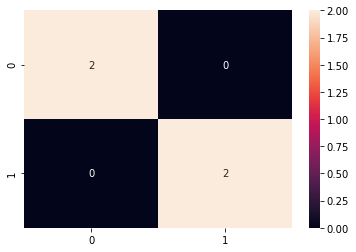

In [59]:
sns.heatmap(cm,annot=True)
plt.show()

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

target_name = ['class0','class1']
print(classification_report(y_test,y_predict,target_names=target_name))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

      class0       1.00      1.00      1.00         2
      class1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

1.0


### 값의 연관성 확인
- summary 보이는 Pvalue값이 0.05보다 크면 x값에서 제거함.

In [62]:
import statsmodels.api as sm
logit_mod = sm.Logit(y_train, x_train)
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.483183
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.2696
Time:                        15:10:52   Log-Likelihood:                -3.8655
converged:                       True   LL-Null:                       -5.2925
Covariance Type:            nonrobust   LLR p-value:                   0.09114
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0800      0.583      0.137      0.891      -1.063       1.223
x2             0.1752      0.538      0.326      0.744      -0.879       1.229
==============================================================================
"""

## ROC
- 이항분류에서 일치율을 시각화함. 이때 ROC의 하단면적을 AUC라고함.

In [63]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
# y : admit(입학허가), x :(gre 점수, gpa 학점 평균, prestige 출신학교)
#  출신학교를 1,2,3,4로 일종의 카테고리(그룹항목)으로 함
df = pd.read_csv('admissions.csv') # 캐글 데이터
df.head()